# Лабораторная работа №5
### Дьячков Вадим, 33501/4

### Цели работы
1. Приобретение навыков построения, инициализации и обучения НС с задержками.
2. Исследование НС с задержками при решении задач прогнозирования зависимостей, моделируемых разностными уравнениями с конечной и бесконечной памятью.
3. Настройка оптимальным образом количества и глубины задержек в НС.

### Инициализация окружения

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import savemat

np.random.seed(42)
sns.set(font_scale=1.25)

BLUE = '#0074D9'
RED = '#FF4136'

## №6a. Линейная функция с памятью

### Задание 1

Линейная функция с памятью:
$$ y[n] = \sum_{i=0}^{h-1} x[n - i\cdot d]\cdot k_i $$
где $h$ – ширина окна, $d$ – глубина задержек, $k_i$ – коэффициенты.

In [2]:
h = 8
d = 4
k = np.array([0.183, -0.826, 0.286, -0.927, 0.970, -0.571, -0.143, -0.375])

In [3]:
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    for n in range(N):
        idx = np.arange(n, n - h * d, -d)
        expr = idx >= 0
        good_idx = idx[expr]
        Y[n] = sum(X[good_idx] * k[expr])
    return Y

### Задание 2

Подадим несколько вариантов входных сигналов: гармонический, ступенчато изменяющийся и случайный. Изобразим сформированные входные (синим цветом) и выходные (красным цветом) сигналы.

In [4]:
def draw_series(seq, X1, Y1, X2, Y2, X3, Y3):
    alpha = 0.8
    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    f.set_size_inches(6, 4)
    f.set_dpi(120)
    ax1.plot(seq, X1, c=BLUE, alpha=alpha)
    ax1.plot(seq, Y1, c=RED, alpha=alpha)
    ax2.plot(seq, X2, c=BLUE, alpha=alpha)
    ax2.plot(seq, Y2, c=RED, alpha=alpha)
    ax3.plot(seq, X3, c=BLUE, alpha=alpha)
    ax3.plot(seq, Y3, c=RED, alpha=alpha)
    ax2.set_ylabel('$y=f(x)$')
    ax3.set_xlabel('$x$')
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.show()

In [5]:
seq = np.arange(0, 100)
X1 = np.sin(seq / 2)
X2 = np.array([np.random.randint(10) * np.ones(10) for i in np.arange(10)]).flatten()
X3 = np.random.randint(0, 10, 100)

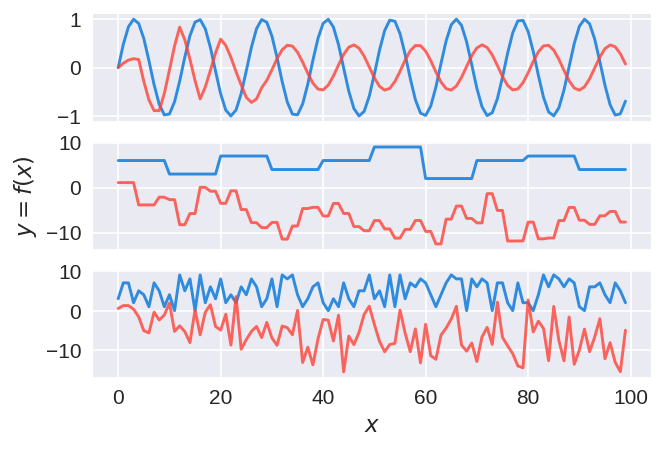

In [6]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)
savemat('matlab/6a.mat', mdict={'X1': X1, 'X2': X2, 'X3': X3,
                                'Y1': Y1, 'Y2': Y2, 'Y3': Y3})

## №6b. Нелинейная функция с памятью

### Задание 1

Нелинейная функция с памятью:
$$ y[n] = f(x[n], x[n - d],..., x[n - (h - 1)\cdot d]) $$
где $h$ – ширина окна, $d$ – глубина задержек.

In [7]:
h = 3
d = 2
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    for n in range(N):
        idx = np.arange(n, n - h * d, -d)
        expr = idx >= 0
        good_idx = idx[expr]
        Y[n] = np.sqrt(np.sum(X[good_idx] ** 2))
    return Y

### Задание 2

Подадим несколько вариантов входных сигналов: гармонический, ступенчато изменяющийся и случайный. Изобразим сформированные входные (синим цветом) и выходные (красным цветом) сигналы.

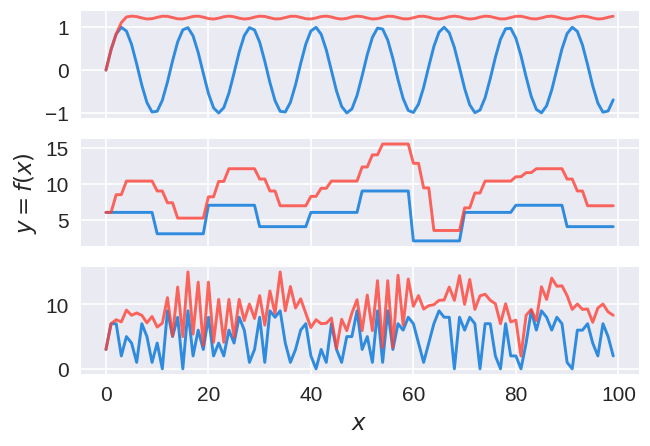

In [8]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)
savemat('matlab/6b.mat', mdict={'X1': X1, 'X2': X2, 'X3': X3,
                                'Y1': Y1, 'Y2': Y2, 'Y3': Y3})

## №7. Линейное разностное уравнение

### Задание 1

Зададим линейное разностное уравнение
$$y[n] = (z_1 + z_2) \cdot y[n-1] - z_1 \cdot z_2 \cdot y[n-2] + k_1 \cdot X[n] + k_2 \cdot X[n-1] $$
где $z_1, z_2, k_1, k_2$ – некоторые коэффициенты.

In [9]:
z1, z2 = 0.5, -0.5
k1, k2 = 0.25, 0.5

In [10]:
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    for n in range(2, N):
        Y[n] = (z1 + z2) * Y[n-1] - z1 * z2 * Y[n-2] + k1 * X[n] + k2 * X[n-1]
    return Y

### Задание 2

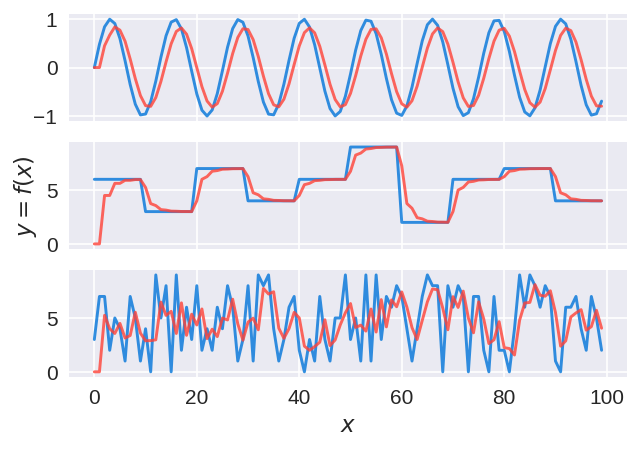

In [11]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)
savemat('matlab/7.mat', mdict={'X1': X1, 'X2': X2, 'X3': X3,
                                'Y1': Y1, 'Y2': Y2, 'Y3': Y3})